In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [24]:
df  = pd.read_csv(r'C:\Users\Aditya\OneDrive - Manipal Academy of Higher Education\Desktop\SP\Manas\Datasets\weatherAUS.csv')

In [25]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [26]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [27]:
df.drop('Date', inplace=True, axis=1)
df.drop('Location', inplace=True, axis=1)
df.drop('WindGustDir', inplace=True, axis=1)
df.drop('WindDir9am', inplace=True, axis=1)
df.drop('WindDir3pm', inplace=True, axis=1)

In [33]:
df.drop(df[df['RainToday'] == 12.19403438096892].index, inplace = True)
df.drop(df[df['RainTomorrow'] == 12.19403438096892].index, inplace = True)

In [28]:
df = df.fillna(value=df['MinTemp'].mean())
df = df.fillna(value=df['MaxTemp'].mean())
df = df.fillna(value=df['Rainfall'].mean())
df = df.fillna(value=df['Evaporation'].mean())
df = df.fillna(value=df['Sunshine'].mean())
df = df.fillna(value=df['WindGustSpeed'].mean())
df = df.fillna(value=df['WindSpeed9am'].mean())
df = df.fillna(value=df['WindSpeed3pm'].mean())
df = df.fillna(value=df['Humidity9am'].mean())
df = df.fillna(value=df['Humidity3pm'].mean())
df = df.fillna(value=df['Pressure9am'].mean())
df = df.fillna(value=df['Pressure3pm'].mean())
df = df.fillna(value=df['Cloud9am'].mean())
df = df.fillna(value=df['Cloud3pm'].mean())
df = df.fillna(value=df['Temp9am'].mean())
df = df.fillna(value=df['Temp3pm'].mean())

In [29]:
df= df.replace(to_replace ="Yes",value =1)
df =df.replace(to_replace ="No",value =0)

In [31]:
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday']]
y= df['RainTomorrow']

In [34]:
df.RainToday.unique()

array([0., 1.])

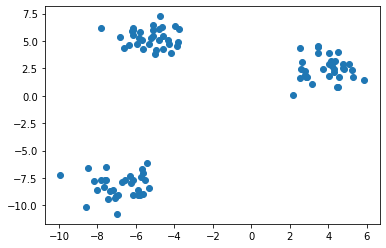

In [47]:
X, Y = make_blobs(centers=3)
plt.scatter(X[:,0], X[:,1])

In [48]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

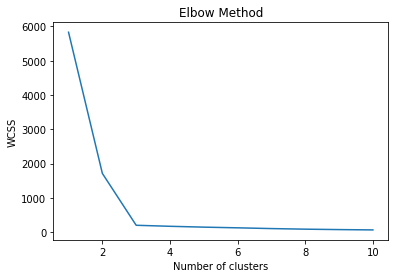

In [49]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

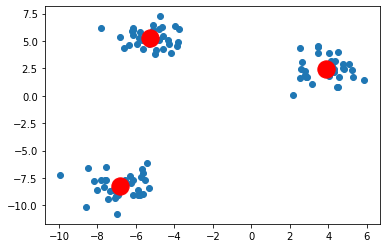

In [50]:
kmeans = KMeans(n_clusters=3)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')


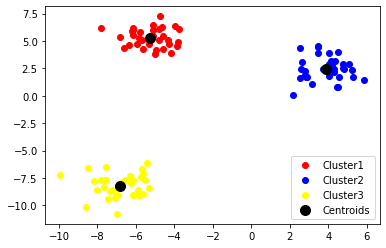

In [51]:
plt.scatter( X[pred_y == 0, 0], X[pred_y == 0, 1], c = 'red', label = 'Cluster1') 
plt.scatter( X[pred_y == 1, 0], X[pred_y == 1, 1],  c = 'blue', label = 'Cluster2')
plt.scatter( X[pred_y == 2, 0], X[pred_y == 2, 1],  c = 'yellow', label = 'Cluster3') 
plt.scatter( kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

In [52]:
X[pred_y == 1, 1]

array([2.41697347, 2.39487235, 1.44808296, 0.80036755, 1.69294137,
       2.24081469, 1.09784707, 0.08815612, 4.44433581, 2.47718104,
       1.9076521 , 3.86460306, 2.43384423, 3.12797295, 2.7354187 ,
       2.89099537, 1.76279158, 4.57598848, 2.86881222, 4.03050851,
       3.94227744, 1.70625534, 4.34436332, 0.80456646, 1.58201783,
       2.3051469 , 1.6971977 , 3.21042717, 2.50864712, 2.93645683,
       2.16778785, 1.66777436, 3.11808532])

In [53]:
kmeans.cluster_centers_

array([[-5.255362  ,  5.30400322],
       [ 3.89195766,  2.46336858],
       [-6.82089097, -8.19690015]])